# Семинар №7 по курсу "Машинное обучение и pаспознавание образов"

Дерево решений. Кросс-валидация.

# Дерево решений


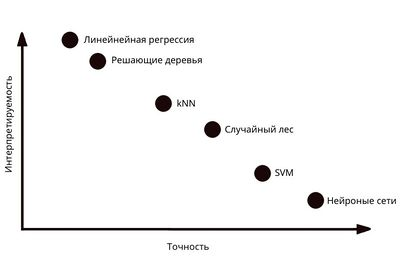

Дерево принятия решений (также называют деревом классификации или регрессионным деревом) — средство поддержки принятия решений, использующееся в машинном обучении, анализе данных и статистике.

Собственно, само дерево решений — это метод представления решающих правил в иерархической структуре, состоящей из элементов двух типов — узлов (node) и листьев (leaf). В узлах находятся решающие правила и производится проверка соответствия примеров этому правилу по какому-либо атрибуту обучающего множества.


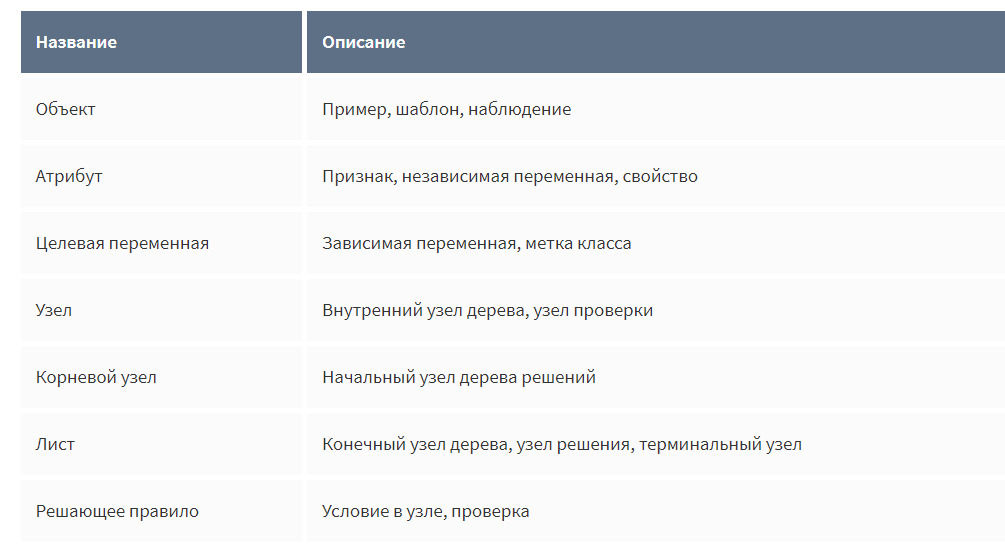

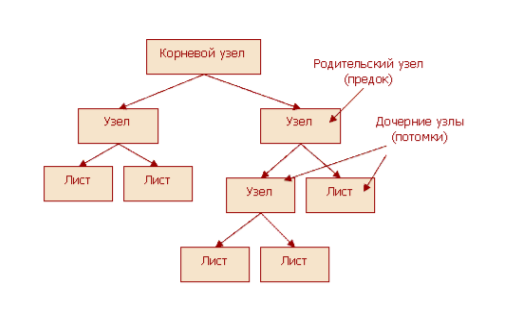

В простейшем случае, в результате проверки, множество примеров, попавших в узел, разбивается на два подмножества, в одно из которых попадают примеры, удовлетворяющие правилу, а в другое — не удовлетворяющие.

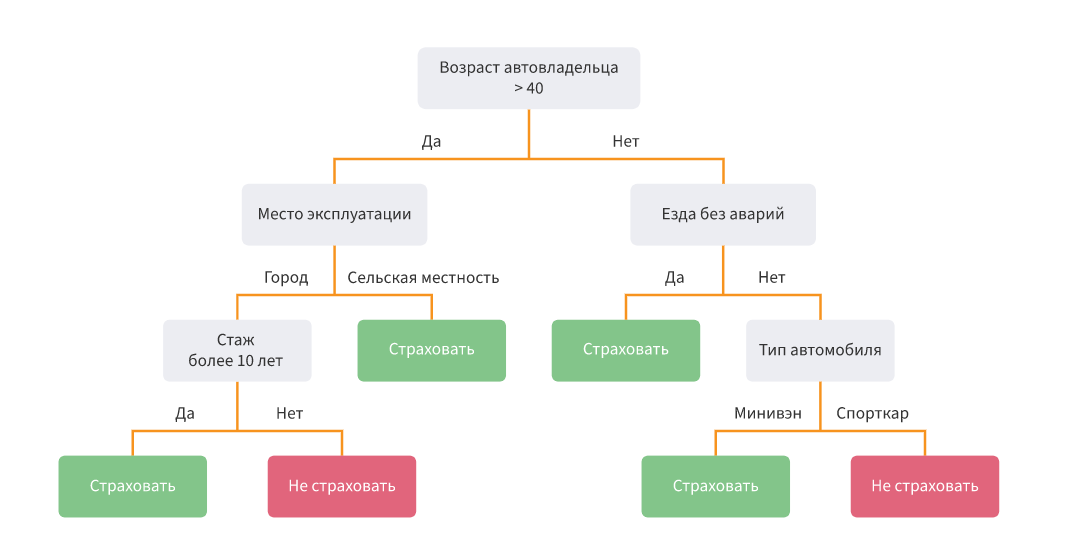

Затем к каждому подмножеству вновь применяется правило и процедура рекурсивно повторяется пока не будет достигнуто некоторое условие остановки алгоритма. В результате в последнем узле проверка и разбиение не производится и он объявляется листом. Лист определяет решение для каждого попавшего в него примера. Для дерева классификации — это класс, ассоциируемый с узлом, а для дерева регрессии — соответствующий листу модальный интервал целевой переменной.
Таким образом, в отличие от узла, в листе содержится не правило, а подмножество объектов, удовлетворяющих всем правилам ветви, которая заканчивается данным листом.

Очевидно, чтобы попасть в лист, пример должен удовлетворять всем правилам, лежащим на пути к этому листу. Поскольку путь в дереве к каждому листу единственный, то и каждый пример может попасть только в один лист, что обеспечивает единственность решения.

Пример в Scikit-learn

In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree

# Load in our dataset
iris_data = load_iris()

# Initialize our decision tree object
classification_tree = tree.DecisionTreeClassifier()

# Train our decision tree (tree induction + pruning)
classification_tree = classification_tree.fit(iris_data.data, iris_data.target)

Scikit-learn также позволяет визуализировать дерево с помощью библиотеки graphviz, в которой есть несколько очень полезных опций для визуализации узлов решений и разбиений, выученных моделью. Ниже обозначим узлы разными цветами, отталкиваясь от признаков имен, и отобразим класс и признак каждого узла.

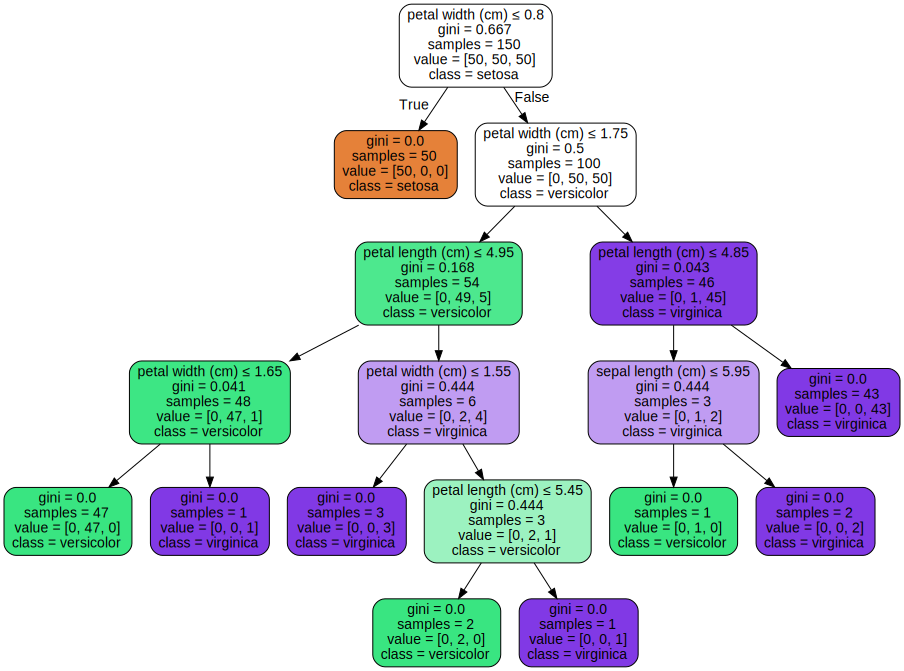

In [ ]:
import graphviz
dot_data = tree.export_graphviz(classification_tree, out_file=None,
                     feature_names=iris_data.feature_names,
                     class_names=iris_data.target_names,
                     filled=True, rounded=True,
                     special_characters=True)
graph = graphviz.Source(dot_data)
#graph.render("iris", view=True)
graph

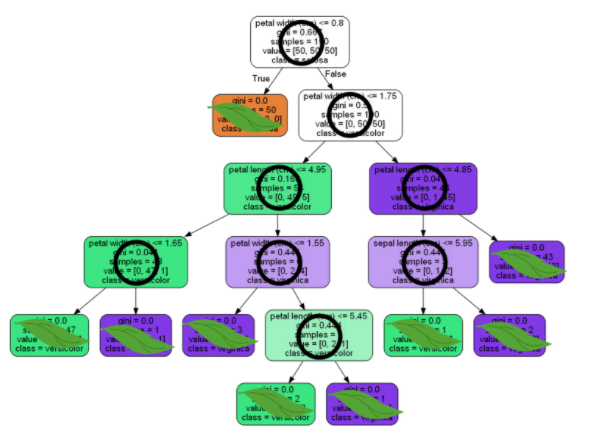

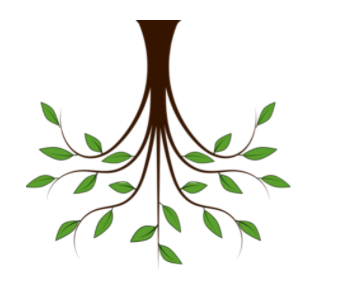

## Параметры модели дерева решений

In [ ]:
classification_tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**max_depth**: максимальная глубина дерева — точка, на которой останавливается разбиение узлов. Это похоже на выбор максимального количества слоев в глубокой нейронной сети. Меньшее количество сделает модель быстрой, но не точной. Большее количество увеличивает точность, но создает риски переобучения и замедляет процесс.

**min_samples_split**: необходимое минимальное количество выборок для разбиения узлов.

**max_features**: число признаков для поиска лучшей точки для разбиения. Чем больше число, тем лучше результат. Но в этом случае обучение займет больше времени.


**min_impurity_split**: порог для ранней остановки роста дерева. Узел разобьется только в том случае, если его точность будет выше указанного порога. Такой метод может служить в качестве компромисса между минимизацией переобучения (высокое значение, маленькое дерево) и высокой точностью (низкое значение, большое дерево).


**presort**: выбор того, нужно ли предварительно сортировать данные для ускорения поиска наилучшего разбиения при подборе. Если данные заранее отсортируются по каждому признаку, то алгоритму обучения будет гораздо проще найти хорошие значения для разбиения.

**max_features**:Количество признаков, которые следует учитывать при поиске лучшего разделения. Если это значение не установлено, дерево решений будет учитывать все признаки, доступные для наилучшего разделения В зависимости от вашего приложения, часто бывает полезно настроить этот параметр.
Рекомендуемые значения по умолчанию: m = p / 3 для задач регрессии и m = √p для задач классификации.

Наилучшее значение m зависит от задачи, поэтому m следует рассматривать как параметр настройки. https://stats.stackexchange.com/questions/324370/references-on-number-of-features-to-use-in-random-forest-regression

In [ ]:
# Initialize our decision tree object
classification_tree = tree.DecisionTreeClassifier(max_depth = 2)

# Train our decision tree (tree induction + pruning)
classification_tree = classification_tree.fit(iris_data.data, iris_data.target)

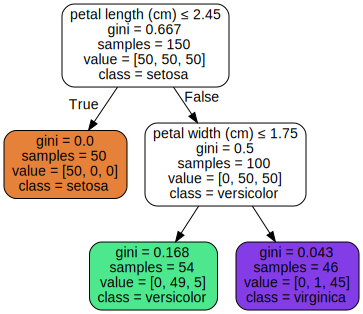

In [ ]:
data_depth2 = tree.export_graphviz(classification_tree, out_file=None,
                     feature_names=iris_data.feature_names,
                     class_names=iris_data.target_names,
                     filled=True, rounded=True,
                     special_characters=True)
graph = graphviz.Source(data_depth2)
graph

Вы можете видеть, что каждая коробка содержит несколько характеристик. Давайте начнем с описания содержимого самого верхнего узла, чаще всего называемого корневой узел. Корневой узел находится на глубине нуля. Узел - это точка в дереве решений, где задается вопрос. Это действие делит данные на меньшие подмножества.

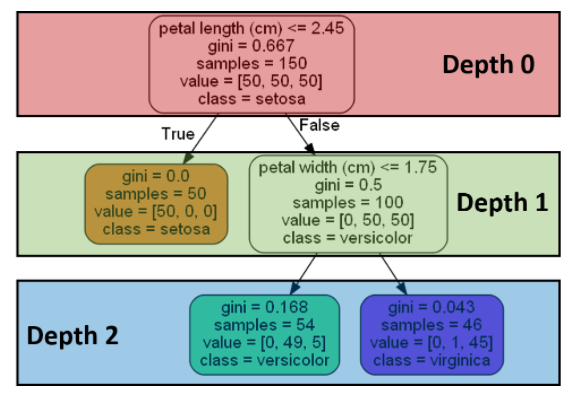

длина лепестка (см) <= 2,45: Первый вопрос, который задает дерево решений, - это если длина лепестка меньше 2,45. Основываясь на результате, он следует либо по истинному, либо по ложному пути.

Джини = 0,667: Оценка Джини - это показатель, который количественно определяет чистоту узла / листа. Оценка Джини больше нуля означает, что образцы, содержащиеся в этом узле, относятся к разным классам. Оценка Джини, равная нулю, означает, что узел чистый, что в этом узле существует только один класс выборок.Показатель Джини больше нуля -  поэтому мы знаем, что образцы, содержащиеся в корневом узле, относятся к разным классам.

samples = 150: Поскольку набор данных цветов  содержит 150 образцов, это значение установлено равным 150.

value = [50, 50, 50]: Список говорит вам, сколько образцов в данном узле попадают в каждую категорию. Первый элемент списка показывает количество образцов, принадлежащих классу setosa, второй элемент списка показывает количество образцов, принадлежащих классу versicolor, а третий элемент списка показывает количество принадлежащих ему образцов. в классе Вирджиники. Обратите внимание, что этот узел не является чистым, поскольку в одном и том же узле содержатся разные типы классов. Мы знали это уже по счету Джини, но на самом деле приятно видеть это.

class = сетоса: значение показывает прогноз, который сделает данный узел, и его можно определить поvalueсписок. Какой бы класс ни встречался в узле, он будет выбран как class. Если бы дерево решений заканчивалось в корневом узле, было бы предсказано, что все 150 выборок принадлежали к классу setosa. Конечно, это не имеет смысла, поскольку для каждого класса существует одинаковое количество выборок. Скорее всего, дерево решений запрограммировано на выбор первого класса в списке, если для каждого класса имеется равное количество выборок.

## Энтропия

Информацио́нная энтропи́я — мера неопределённости некоторой системы (в статистической физике или теории информации), в частности непредсказуемость появления какого-либо символа первичного алфавита.

Энтропия Шеннона определяется для системы с $N$ возможными состояниями следующим образом:

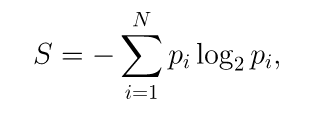

где $p_i$ – вероятности нахождения системы в $i$-ом состоянии. Это очень важное понятие, используемое в физике, теории информации и других областях. Опуская предпосылки введения (комбинаторные и теоретико-информационные) этого понятия, отметим, что, интуитивно, энтропия соответствует степени хаоса в системе. Чем выше энтропия, тем менее упорядочена система и наоборот.

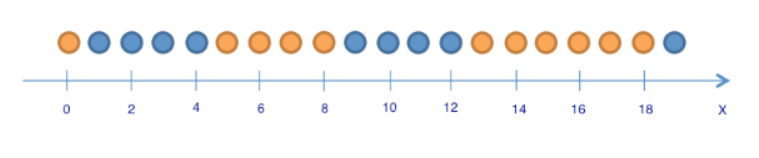

Здесь 9 синих шариков и 11 желтых. Если мы наудачу вытащили шарик, то он с вероятностью $p_1=\frac{9}{20}$ будет синим и с вероятностью $p_2=\frac{11}{20}$ – желтым. Значит, энтропия состояния $S_0 = -\frac{9}{20}\log_2{\frac{9}{20}}-\frac{11}{20}\log_2{\frac{11}{20}} \approx 1$. Само это значение пока ни о чем нам не говорит. Теперь посмотрим, как изменится энтропия, если разбить шарики на две группы – с координатой меньше либо равной 12 и больше 12.

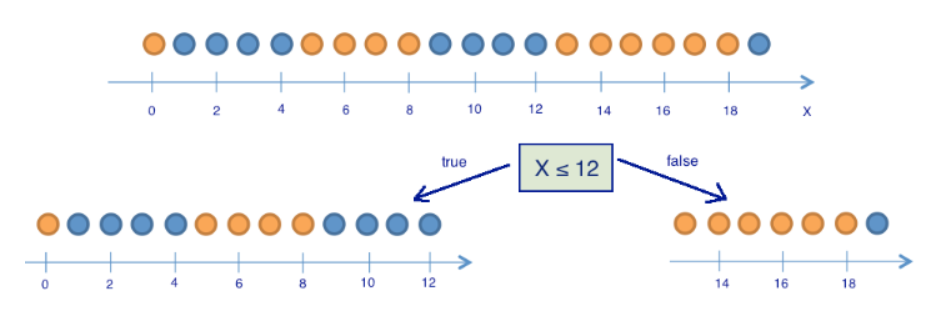

В левой группе оказалось 13 шаров, из которых 8 синих и 5 желтых. Энтропия этой группы равна $S_1 = -\frac{5}{13}\log_2{\frac{5}{13}}-\frac{8}{13}\log_2{\frac{8}{13}} \approx 0.96$. В правой группе оказалось 7 шаров, из которых 1 синий и 6 желтых. Энтропия правой группы равна $S_2 = -\frac{1}{7}\log_2{\frac{1}{7}}-\frac{6}{7}\log_2{\frac{6}{7}} \approx 0.6$. Как видим, энтропия уменьшилась в обеих группах по сравнению с начальным состоянием, хоть в левой и не сильно. Поскольку энтропия – по сути степень хаоса (или неопределенности) в системе, уменьшение энтропии называют приростом информации. Формально прирост информации (information gain, IG) при разбиении выборки по признаку $Q$ (в нашем примере это признак "$x \leq 12$") определяется как

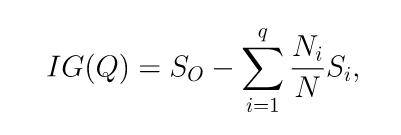

где $q$ – число групп после разбиения, $N_i$ – число элементов выборки, у которых признак $Q$ имеет $i$-ое значение. В нашем случае после разделения получилось две группы ($q = 2$) – одна из 13 элементов ($N_1 = 13$), вторая – из 7 ($N_2 = 7$). Прирост информации получился

**Посичтайте значение прироста информации:**

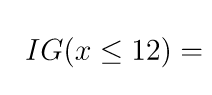

Получается, разделив шарики на две группы по признаку "координата меньше либо равна 12", мы уже получили более упорядоченную систему, чем в начале. Продолжим деление шариков на группы до тех пор, пока в каждой группе шарики не будут одного цвета.

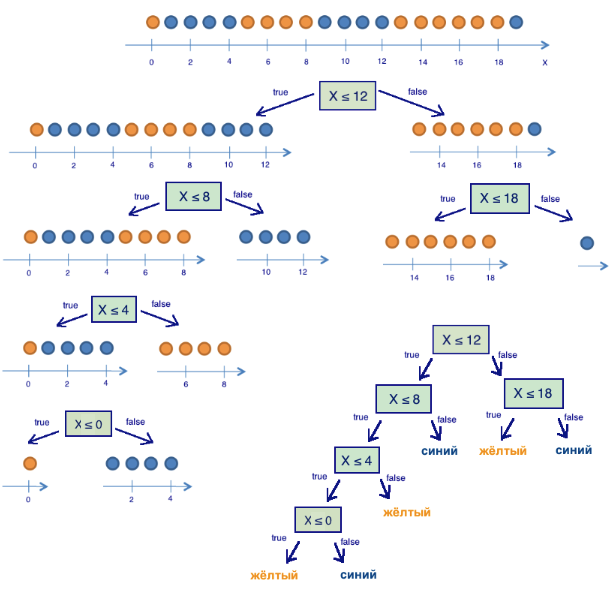

Для правой группы потребовалось всего одно дополнительное разбиение по признаку "координата меньше либо равна 18", для левой – еще три. Очевидно, энтропия группы с шариками одного цвета равна 0 ($\log_2{1} = 0$), что соответствует представлению, что группа шариков одного цвета – упорядоченная.
В итоге мы построили дерево решений, предсказывающее цвет шарика по его координате. Отметим, что такое дерево решений может плохо работать для новых объектов (определения цвета новых шариков), поскольку оно идеально подстроилось под обучающую выборку (изначальные 20 шариков). Для классификации новых шариков лучше подойдет дерево с меньшим числом "вопросов", или разделений, пусть даже оно и не идеально разбивает по цветам обучающую выборку.

## Алгоритмы построения дерева

Есть различные способы выбирать очередной признак:

Алгоритм ID3, где выбор признака происходит на основании прироста информации (англ. Gain), либо на основании критерия Джини.


Алгоритм C4.5 (улучшенная версия ID3), где выбор признака происходит на основании нормализованного прироста информации (англ. Gain Ratio).


Алгоритм CART и его модификации — IndCART, DB-CART.


Автоматический детектор взаимодействия Хи-квадрат (CHAID). Выполняет многоуровневое разделение при расчёте классификации деревьев;


MARS: расширяет деревья решений для улучшения обработки цифровых данных.


На практике, в результате работы этих алгоритмов часто получаются слишком подробные деревья, которые при их дальнейшем применении дают много ошибок. Это связано с явлением переобучения. Для сокращения деревьев используют отсечение ветвей (англ. pruning).

Можно убедиться в том, что построенное в предыдущем примере дерево является в некотором смысле оптимальным – потребовалось только 5 "вопросов" (условий на признак $x$), чтобы "подогнать" дерево решений под обучающую выборку, то есть чтобы дерево правильно классифицировало любой обучающий объект. При других условиях разделения выборки дерево получится глубже.


В основе популярных алгоритмов построения дерева решений, таких как ID3 и C4.5, лежит принцип жадной максимизации прироста информации – на каждом шаге выбирается тот признак, при разделении по которому прирост информации оказывается наибольшим. Дальше процедура повторяется рекурсивно, пока энтропия не окажется равной нулю или какой-то малой величине (если дерево не подгоняется идеально под обучающую выборку во избежание переобучения).
В разных алгоритмах применяются разные эвристики для "ранней остановки" или "отсечения", чтобы избежать построения переобученного дерева.

In [ ]:
s0 = вычисляем энтропию исходного множества

Если s0 == 0 значит:
   Все объекты исходного набора, принадлежат к одному классу
   Сохраняем этот класс в качестве листа дерева

Если s0 != 0 значит:
   Ищем предикат, который разбивает исходное множество таким образом чтобы уменьшилось среднее значение энтропии
   Найденный предикат является частью дерева принятия решений, сохраняем его

   Разбиваем исходное множество на подмножества, согласно предикату
   Повторяем данную процедуру рекурсивно для каждого подмножества

## Другие критерии качества разбиения в задаче классификации

Мы разобрались в том, как понятие энтропии позволяет формализовать представление о качестве разбиения в дереве. Но это всего лишь эвристика, существуют и другие:


Неопределенность Джини (Gini impurity): $G = 1 - \sum\limits_k (p_k)^2$.
Максимизацию этого критерия можно интерпретировать как максимизацию числа пар объектов одного класса, оказавшихся в одном поддереве.
Не путать с индексом Джини!

Ошибка классификации (misclassification error): $E = 1 - \max\limits_k p_k$

На практике ошибка классификации почти не используется, а неопределенность Джини и прирост информации работают почти одинаково.


## Пример
Рассмотрим пример применения дерева решений из библиотеки Scikit-learn для синтетических данных. Сгенерируем данные. Два класса будут сгенерированы из двух нормальных распределений с разными средними.

In [ ]:
import numpy as np
# первый класс
np.seed = 7
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)

# добавляем второй класс
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]

Напишем вспомогательную функцию, которая будет возвращать решетку для дальнейшей красивой визуализации.

In [ ]:
def get_grid(data, eps=0.01):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, eps), np.arange(y_min, y_max, eps))

Отобразим данные. Неформально, задача классификации в этом случае – построить какую-то "хорошую" границу, разделяющую 2 класса (красные точки от желтых). Если утрировать, то машинное обучение в этом случае сводится к тому, как выбрать хорошую разделяющую границу. Возможно,  прямая будет слишком простой границей, а какая-то сложная кривая, огибающая каждую красную точку – будет слишком сложной и будем много ошибаться на новых примерах из того же распределения, из которого пришла обучающая выборка. Интуиция подсказывает, что хорошо на новых данных будет работать какая-то *гладкая* граница, разделяющая 2 класса, или хотя бы просто прямая (в $n$-мерном случае - гиперплоскость).

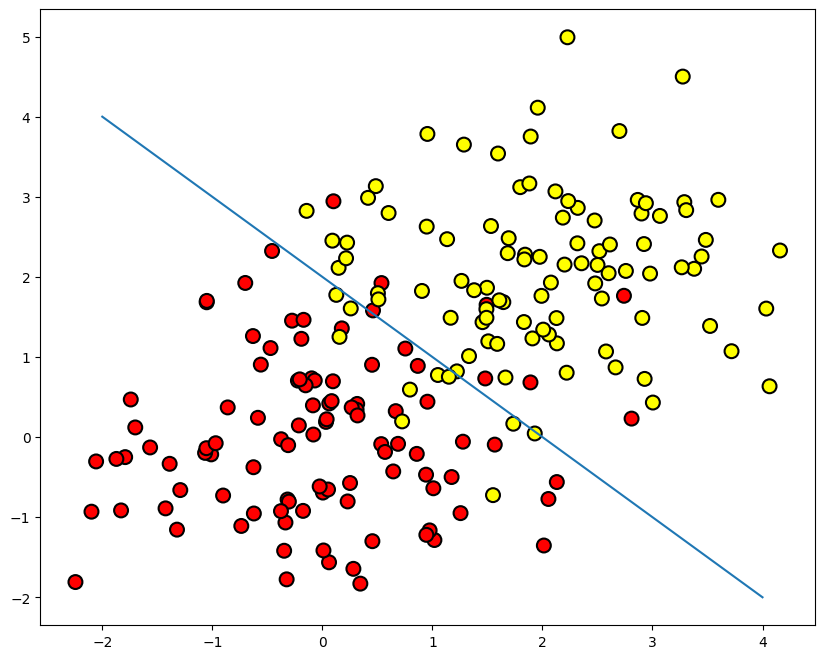

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 8)
plt.scatter(
    train_data[:, 0],
    train_data[:, 1],
    c=train_labels,
    s=100,
    cmap="autumn",
    edgecolors="black",
    linewidth=1.5,
)
plt.plot(range(-2, 5), range(4, -3, -1));

Попробуем разделить эти два класса, обучив дерево решений. В дереве будем использовать параметр `max_depth`, ограничивающий глубину дерева. Визуализируем полученную границу разделения класссов.

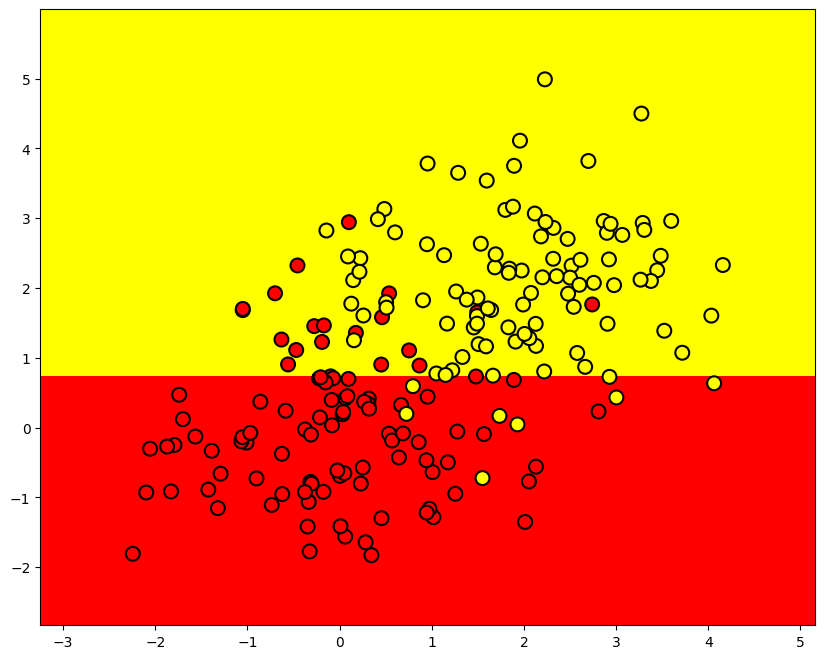

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# параметр min_samples_leaf указывает, при каком минимальном количестве
# элементов в узле он будет дальше разделяться
clf_tree = DecisionTreeClassifier(criterion="entropy", max_depth=1, random_state=17)

# обучаем дерево
clf_tree.fit(train_data, train_labels)

# немного кода для отображения разделяющей поверхности
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap="autumn")

plt.scatter(
    train_data[:, 0],
    train_data[:, 1],
    c=train_labels,
    s=100,
    cmap="autumn",
    edgecolors="black",
    linewidth=1.5,
);


Дерево "нарезает" пространство на прямоугольники. В каждом таком прямоугольнике прогноз дерева будет константным, по превалированию объектов того или иного класса.

In [ ]:
from io import StringIO

import pydotplus

# используем .dot формат для визуализации дерева
from ipywidgets import Image
from sklearn.tree import export_graphviz

dot_data = StringIO()
export_graphviz(clf_tree, feature_names=["x1", "x2"],class_names=['0','1'], out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(value=graph.create_png())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01^\x00\x00\x01\x04\x08\x02\x00\x00\x00\xef\\\xcb\x…

Как "читается" такое дерево?

В начале было 200 объектов, 100 - одного класса и 100 – другого. Энтропия начального состояния была максимальной – 1. Затем было сделано разбиение объектов на 2 группы в зависимости от сравнения признака $x_2$ со значением $0.579$ (найдите этот участок границы на рисунке выше, до дерева). При этом энтропия и в левой, и в правой группе объектов уменьшилась. И так далее, дерево строится до глубины 3. При такой визуализации чем больше объектов одного класса, тем  цвет вершины ближе к темно-оранжевому и, наоборот, чем больше объектов второго класса, тем ближе цвет к темно-синему. В начале объектов одного лкасса поровну, поэтому корневая вершина дерева – белого цвета.

### Как дерево решений работает с количественными признаками

Допустим, в выборке имеется количественный признак "Возраст", имеющий много уникальных значений. Дерево решений будет искать лучшее (по критерию типа прироста информации) разбиение выборки, проверяя бинарные признаки типа "Возраст < 17", "Возраст < 22.87" и т.д. Но что если таких "нарезаний" возраста слишком много? А что если есть еще количественный признак "Зарплата", и зарплату тоже можно "нарезать" большим числом способов? Получается слишком много бинарных признаков для выбора лучшего на каждом шаге построения дерева. Для решения этой проблемы применяют эвристики для ограничения числа порогов, с которыми мы сравниваем количественный признак.

Рассмотрим это на игрушечном примере. Пусть есть следующая выборка:

In [ ]:
data = pd.DataFrame(
    {
        "Возраст": [17, 64, 18, 20, 38, 49, 55, 25, 29, 31, 33],
        "Невозврат кредита": [1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1],
    }
)

In [ ]:
data

,Возраст,Невозврат кредита
0,17,1
1,64,0
2,18,1
3,20,0
4,38,1
5,49,0
6,55,0
7,25,1
8,29,1
9,31,0


Отсортируем ее по возрастанию возраста.

In [ ]:
data.sort_values("Возраст")

,Возраст,Невозврат кредита
0,17,1
2,18,1
3,20,0
7,25,1
8,29,1
9,31,0
10,33,1
4,38,1
5,49,0
6,55,0


Обучим на этих данных дерево решений (без ограничения глубины) и посмотрим на него.

In [ ]:
age_tree = DecisionTreeClassifier(random_state=17)
age_tree.fit(data["Возраст"].values.reshape(-1, 1), data["Невозврат кредита"].values)

DecisionTreeClassifier(random_state=17)

Видим, что дерево задействовало 5 значений, с которыми сравнивается возраст: 43.5, 19, 22.5, 30 и 32 года. Если приглядеться, то это аккурат средние значения между возрастами, при которых целевой класс "меняется" с 1 на 0 или наоборот. Сложная фраза, поэтому пример: 43.5 – это среднее между 38 и 49 годами, клиент, которому 38 лет не вернул кредит, а тот, которому 49 – вернул. Аналогично, 19 лет – среднее между 18 и 20 годами. То есть в качестве порогов для "нарезания" количественного признака, дерево "смотрит" на те значения, при которых целевой класс меняет свое значение.


In [ ]:
dot_data = StringIO()
export_graphviz(age_tree, feature_names=["Возраст"], out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(value=graph.create_png())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x027\x00\x00\x03\x07\x08\x06\x00\x00\x00\xc5%v\xb7\x…

<!--
export_graphviz(age_tree, feature_names=['Возраст'],
                out_file='../../img/age_tree.dot', filled=True)
!dot -Tpng '../../img/age_tree.dot' -o '../../img/age_tree.png'
<img src='../../img/age_tree.png'>
-->

Рассмотрим пример посложнее: добавим признак "Зарплата" (тыс. рублей/месяц).

In [ ]:
data2 = pd.DataFrame(
    {
        "Возраст": [17, 64, 18, 20, 38, 49, 55, 25, 29, 31, 33],
        "Зарплата": [25, 80, 22, 36, 37, 59, 74, 70, 33, 102, 88],
        "Невозврат кредита": [1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1],
    }
)

In [ ]:
data2

,Возраст,Зарплата,Невозврат кредита
0,17,25,1
1,64,80,0
2,18,22,1
3,20,36,0
4,38,37,1
5,49,59,0
6,55,74,0
7,25,70,1
8,29,33,1
9,31,102,0


Если отсортировать по возрасту, то целевой класс ("Невозврат кредита") меняется (с 1 на 0 или наоборот) 5 раз. А если отсортировать по зарплате – то 7 раз. Как теперь дерево будет выбирать признаки? Посмотрим.

In [ ]:
data2.sort_values("Возраст")

,Возраст,Зарплата,Невозврат кредита
0,17,25,1
2,18,22,1
3,20,36,0
7,25,70,1
8,29,33,1
9,31,102,0
10,33,88,1
4,38,37,1
5,49,59,0
6,55,74,0


In [ ]:
data2.sort_values("Зарплата")

,Возраст,Зарплата,Невозврат кредита
2,18,22,1
0,17,25,1
8,29,33,1
3,20,36,0
4,38,37,1
5,49,59,0
7,25,70,1
6,55,74,0
1,64,80,0
10,33,88,1


In [ ]:
age_sal_tree = DecisionTreeClassifier(random_state=17)
age_sal_tree.fit(
    data2[["Возраст", "Зарплата"]].values, data2["Невозврат кредита"].values
);

In [ ]:
dot_data = StringIO()
export_graphviz(
    age_sal_tree, feature_names=["Возраст", "Зарплата"], out_file=dot_data, filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(value=graph.create_png())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02W\x00\x00\x02|\x08\x02\x00\x00\x00\\2\x13&\x00\x0…

<!--
export_graphviz(age_sal_tree, feature_names=['Возраст', 'Зарплата'],
                out_file='../../img/age_sal_tree.dot', filled=True)
!dot -Tpng '../../img/age_sal_tree.dot' -o '../../img/age_sal_tree.png'
<img src='../../img/age_sal_tree.png'>
-->

Видим, что в дереве задействованы как разбиения по возрасту, так и по зарплате. Причем пороги, с которыми сравниваются признаки: 43.5 и 22.5 года – для возраста и 95 и 30.5 тыс. руб/мес – для зарплаты. И опять можно заметить, что 95 тыс. – это среднее между 88 и 102, при этом человек с зарплатой 88 оказался "плохим", а с 102 – "хорошим". То же самое для 30.5 тыс. То есть перебирались сравнения зарплаты и возраста не со всеми возможными значениями, а только с несколькими. А почему в дереве оказались именно эти признаки? Потому что по ним разбиения оказались лучше (по критерию неопределенности Джини).  

**Вывод:** самая простая эвристика для обработки количественных признаков в дереве решений: количественный признак сортируется по возрастанию, и в дереве проверяются только те пороги, при которых целевой признак меняет значение. Звучит не очень строго, но надеюсь, я донес смысл с помощью игрушечных примеров.

Дополнительно, когда в данных много количественных признаков, и у каждого много уникальных значений, могут отбираться не все пороги, описанные выше, а только топ-N, дающих максимальный прирост все того же критерия. То есть, по сути, для каждого порога строится дерево глубины 1, считается насколько снизилась энтропия (или неопределенность Джини) и выбираются только лучшие пороги, с которыми стоит сравнивать количественный признак.

Для иллюстрации: при разбиении по признаку "Зарплата $\leq$ 34.5" в левой подгруппе энтропия 0 (все клиенты "плохие"), а в правой – 0.954 (3 "плохих" и 5 "хороших", можете проверить, 1 часть домашнего задания будет как раз на то, чтоб разобраться досканально с построением деревьев). Прирост информации получается примерно 0.3.
А при разбиении по признаку "Зарплата $\leq$ 95" в левой подгруппе энтропия 0.97 (6 "плохих" и 4 "хороших"), а в правой – 0 (всего один объект). Прирост информации получается примерно 0.11.
Посчитав таким образом прирост информации для каждого разбиения, можно предварительно, до построения большого дерева (по всем признакам) отобрать пороги, с которыми будет сравниваться каждый количественный признак.

Еще примеры дискретизации количественных признаков можно посмотреть в постах, подобных [этому](http://kevinmeurer.com/a-simple-guide-to-entropy-based-discretization/) или [этому](http://clear-lines.com/blog/post/Discretizing-a-continuous-variable-using-Entropy.aspx). Одна из самых известных научных статей на эту тему – "On the handling of continuous-valued attributes in decision tree generation" (U.M. Fayyad. K.B. Irani, "Machine Learning", 1992).

## Критерий остановки алгоритма

Очевидным решением проблемы является принудительная остановка построения дерева, пока оно не стало переобученным. Для этого разработаны следующие подходы.

* **Ранняя остановка** — алгоритм будет остановлен, как только будет достигнуто заданное значение некоторого критерия, например процентной доли правильно распознанных примеров. Единственным преимуществом подхода является снижение времени обучения. Главным недостатком является то, что ранняя остановка всегда делается в ущерб точности дерева, поэтому многие авторы рекомендуют отдавать предпочтение отсечению ветвей.
* **Ограничение глубины дерева** — задание максимального числа разбиений в ветвях, по достижении которого обучение останавливается. Данный метод также ведёт к снижению точности дерева.
* **Задание минимально допустимого число примеров в узле** — запретить алгоритму создавать узлы с числом примеров меньше заданного (например, 5). Это позволит избежать создания тривиальных разбиений и, соответственно, малозначимых правил.

## Отсечение ветвей

Если «рост» дерева не ограничить, то в результате будет построено сложное дерево с большим числом узлов и листьев. Как следствие оно будет трудно интерпретируемым. В то же время решающие правила в таких деревьях, создающие узлы, в которые попадают два-три примера, оказываются малозначимыми с практической точки зрения.

Гораздо предпочтительнее иметь дерево, состоящее из малого количества узлов, которым бы соответствовало большое число примеров из обучающей выборки. Поэтому представляет интерес подход, альтернативный ранней остановке — построить все возможные деревья и выбрать то из них, которое при разумной глубине обеспечивает приемлемый уровень ошибки распознавания, т.е. найти наиболее выгодный баланс между сложностью и точностью дерева.

Альтернативным подходом является так называемое отсечение ветвей (pruning). Он содержит следующие шаги:

* Построить полное дерево (чтобы все листья содержали примеры одного класса).
* Определить два показателя: относительную точность модели — отношение числа правильно распознанных примеров к общему числу примеров, и абсолютную ошибку — число неправильно классифицированных примеров.
* Удалить из дерева листья и узлы, отсечение которых не приведёт к значимому уменьшению точности модели или увеличению ошибки.

Отсечение ветвей, очевидно, производится в направлении, противоположном направлению роста дерева, т.е. снизу вверх, путём последовательного преобразования узлов в листья. Преимуществом отсечения ветвей по сравнению с ранней остановкой является возможность поиска оптимального соотношения между точностью и понятностью дерева. Недостатком является большее время обучения из-за необходимости сначала построить полное дерево.

## Преимущества алгоритма

* быстрый процесс обучения;
* генерация правил в областях, где эксперту
* трудно формализовать свои знания;
* извлечение правил на естественном языке;
* интуитивно понятная классификационная модель;
* высокая точность предсказания, сопоставимая с другими методами анализа данных (статистика, нейронные сети);
* построение непараметрических моделей.

## Пример

Рассмотрим пример применения дерева решений из библиотеки Scikit-learn для синтетических данных. Два класса будут сгенерированы из двух нормальных распределений с разными средними.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
import numpy as np
# первый класс
np.seed = 7
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)

# добавляем второй класс
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]

Отобразим данные. Неформально, задача классификации в этом случае – построить какую-то "хорошую" границу, разделяющую 2 класса (красные точки от желтых). Если утрировать, то машинное обучение в этом случае сводится к тому, как выбрать хорошую разделяющую границу. Возможно, прямая будет слишком простой границей, а какая-то сложная кривая, огибающая каждую красную точку – будет слишком сложной и будем много ошибаться на новых примерах из того же распределения, из которого пришла обучающая выборка. Интуиция подсказывает, что хорошо на новых данных будет работать какая-то гладкая граница, разделяющая 2 класса, или хотя бы просто прямая (в $n$-мерном случае – гиперплоскость).

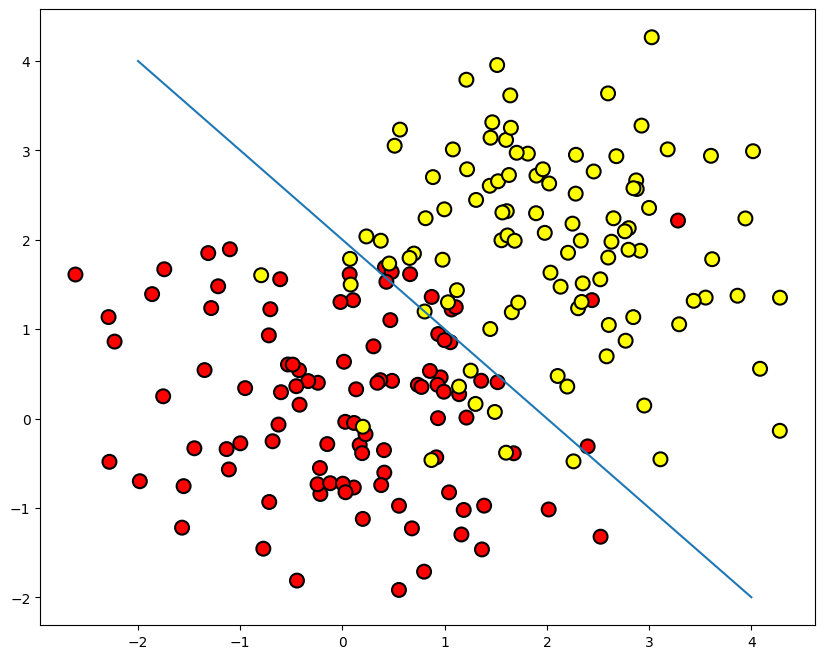

In [ ]:
plt.rcParams['figure.figsize'] = (10,8)
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100,
cmap='autumn', edgecolors='black', linewidth=1.5);
plt.plot(range(-2,5), range(4,-3,-1));

Попробуем разделить эти два класса, обучив дерево решений. В дереве будем использовать параметр max_depth, ограничивающий глубину дерева. Визуализируем полученную границу разделения классов.

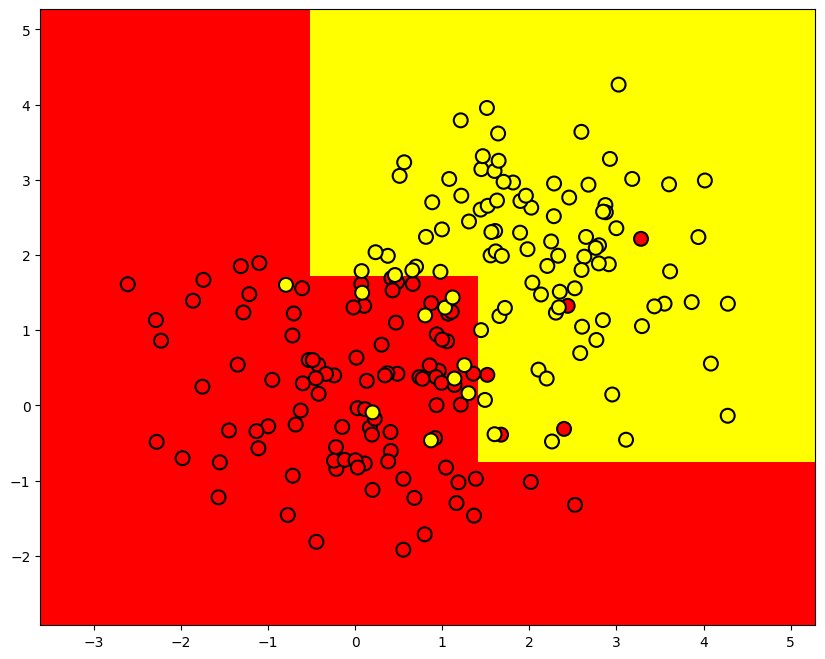

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Напишем вспомогательную функцию, которая будет возвращать решетку для дальнейшей визуализации.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# параметр min_samples_leaf указывает, при каком минимальном количестве
# элементов в узле он будет дальше разделяться
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=17)

# обучаем дерево
clf_tree.fit(train_data, train_labels)

# немного кода для отображения разделяющей поверхности
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100,
cmap='autumn', edgecolors='black', linewidth=1.5);

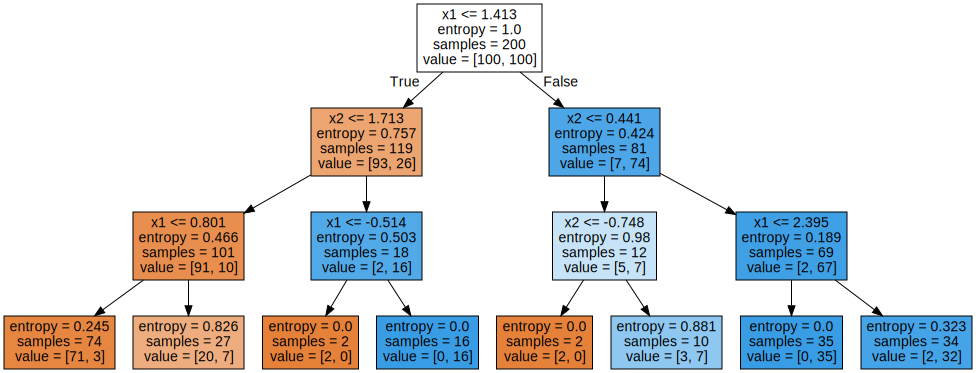

In [ ]:
import graphviz
from sklearn import tree
data = tree.export_graphviz(clf_tree, out_file=None,
                     feature_names=['x1', 'x2'], filled=True)
graph = graphviz.Source(data)
graph

Как "читается" такое дерево?


В начале было 200 объектов, 100 — одного класса и 100 – другого. Энтропия начального состояния была максимальной – 1. Затем было сделано разбиение объектов на 2 группы в зависимости от сравнения признака $x_2$ со значением $1.046$ (найдите этот участок границы на рисунке выше, до дерева). При этом энтропия и в левой, и в правой группе объектов уменьшилась. И так далее, дерево строится до глубины 3. При такой визуализации чем больше объектов одного класса, тем цвет вершины ближе к темно-оранжевому и, наоборот, чем больше объектов второго класса, тем ближе цвет к темно-синему. В начале объектов одного класса поровну, поэтому корневая вершина дерева – белого цвета.

## Оценка алгоритма (classification_report)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_true = [0, 1, 2, 2, 2]
y_pred = [0, 0, 2, 2, 1]
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.50      1.00      0.67         1
     class 1       0.00      0.00      0.00         1
     class 2       1.00      0.67      0.80         3

    accuracy                           0.60         5
   macro avg       0.50      0.56      0.49         5
weighted avg       0.70      0.60      0.61         5

